# Титаник (конкурс Kaggle)

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) построть модель логистической регрессии для предсказания выживших пассажиров.

## Задание

1. Построить классификатор используя доступные числовые признаки.
2. Оценить точность и полноту классификации. Постройте график ROC кривой.
3. Расширить пространство признаков на основе имени пассажира и оценить качество новой модели.

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv', index_col=0)
df = df.fillna(0)
X = df.replace('male', 1).replace('female', 0).loc[:, ['Pclass', 'Sex', 'Age', 'Parch', 'Fare']]
y = df.loc[:, 'Survived']

In [18]:
random_point = 1

In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_point)

In [21]:
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())
y_predict = logreg.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print("Показатели модели логистической регрессии на основе числовых признаков:")
print("Accuracy: ", accuracy_score(y_test, y_predict))
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_test, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_test, y_predict))

Показатели модели логистической регрессии на основе числовых признаков:
Accuracy:  0.7611940298507462
Recall:  0.6608695652173913
Precision:  0.7524752475247525


Text(0, 0.5, 'True Positive Rate')

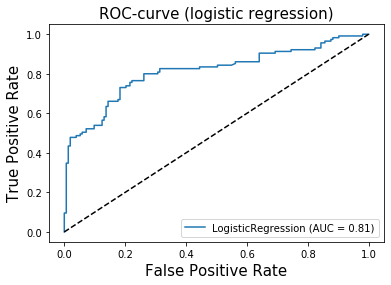

In [24]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(logreg, x_test, y_test)
disp.ax_.plot([0, 1], [0, 1], 'k--');
disp.ax_.set_title('ROC-curve (logistic regression)', fontsize = 15)
disp.ax_.set_xlabel('False Positive Rate', fontsize = 15)
disp.ax_.set_ylabel('True Positive Rate', fontsize = 15)

# Используя кросс-валидацию

In [25]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=2, penalty='l2', scoring='accuracy', random_state=random_point, max_iter=1000)
clf.fit(x_train, y_train.values.ravel())
y_predict = clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Recall: ", recall_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))

Accuracy:  0.75
Recall:  0.6173913043478261
Precision:  0.7553191489361702


Видим, что с применением кросс-валидации значения всех трех метрик снизились

# Расширенная модель

In [26]:
df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Jonkheer      1
Mme           1
Don           1
Countess      1
Lady          1
Ms            1
Sir           1
Name: Name, dtype: int64

In [27]:
df['Name'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : 1,\
                                                                                'Miss' : 2,\
                                                                                'Mrs' : 3,\
                                                                                'Master' : 4, \
                                                                                'Dr' : 5, \
                                                                                'Rev' : 6,
                                                                                'Col' : 7,\
                                                                                'Major' : 7,\
                                                                                'Mlle' : 7, \
                                                                                'Lady' : 8,
                                                                                'Jonkheer' : 8,\
                                                                                'Sir' : 8,\
                                                                                'Capt' : 8,\
                                                                                'Don' : 8, \
                                                                                'Mme' : 8,\
                                                                                'Ms' : 8,\
                                                                                'Countess' : 8})

In [50]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
X = df.replace('male', 1).replace('female', 0).loc[:, ['Pclass', 'Name', 'Sex', 'Age', 'Parch', 'Fare']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_point)
x_train.head()

,Pclass,Name,Sex,Age,Parch,Fare
PassengerId,,,,,,
115,3,"Attalah, Miss. Malake",0,17.0,0,14.4583
875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",0,28.0,0,24.0000
77,3,"Staneff, Mr. Ivan",1,NaN,0,7.8958
877,3,"Gustafsson, Mr. Alfred Ossian",1,20.0,0,9.8458
675,2,"Watson, Mr. Ennis Hastings",1,NaN,0,0.0000


In [30]:
from sklearn import preprocessing
logreg.fit(x_train, y_train.values.ravel())
y_predict = logreg.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
print("Показатели расширенной модели:")
print("Accuracy: ", accuracy_score(y_test, y_predict))
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_test, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_test, y_predict))

Показатели расширенной модели:
Accuracy:  0.7611940298507462
Recall:  0.6608695652173913
Precision:  0.7524752475247525


Таким образом, видим, что при расширении признакового пространства на основе имени пассажира выросли метрики Precision и Recall, а доля верных ответов (Accuracy) не изменилась.

# Сравнение с baseline

In [45]:
woman = len(x_train.query("Sex == 0"))
man = len(x_train.query("Sex == 1"))
print("Доля мужчин в тестовой выборке:", man/(woman + man))

Доля мужчин в тестовой выборке: 0.651685393258427


Таким образом, если бы наш классификатор относил всех мужчин к погибшим, а женщин к выжившим, то показатель Accuracy был бы равен: 0.651685393258427 (baseline)  
При использовании модели логистической регрессии мы добились значения: 0.7611940298507462.  
Следовательно выигрыш в качестве составил примерно 14%. 